## Simple Visualization Tool for PLS results

* Import .mat file with structure generated by RRI PLS software (implemented in MATLAB)

In [3]:


# import

import numpy as np
from matplotlib import pyplot as plt
import scipy

% matplotlib inline

In [361]:
# path of plsmat

plsfile = '/Users/amandae/codeMe/pls4git/example_pls_fc.mat'

def load_pls_result(plsfile):
    mat = scipy.io.loadmat(plsfile)
    plsresult = mat['plsresult'][0,0]
    brain_salience = plsresult['u']
    s = plsresult['s']
    design_salience = plsresult['boot_result'][0,0]['orig_usc']
    perm_pval = plsresult['perm_result'][0,0]['sprob']
    bsr = plsresult['boot_result'][0,0]['compare_u']
    brainscores = plsresult['usc']
    ll = plsresult['boot_result'][0,0]['llusc']
    ul = plsresult['boot_result'][0,0]['ulusc']
    numsubj = plsresult['num_subj_lst'][0]
    
    plsres = dict(s=s, brain_salience = brain_salience, design_salience = design_salience, perm_pval=perm_pval, bsr=bsr, brainscores=brainscores, ll=ll, ul=ul,numsubj=numsubj)
    
    return plsres


# FC in plsresult must have been made by fc_uptri for this to work! 
def make_pls_connmat(res,lv,threshval):

    lv_ind = lv - 1;
    bsr = res['bsr'][:,lv_ind]; bsr = bsr[:, np.newaxis]
    nfeat = int(np.shape(bsr)[0])
    rois = int(0.5 * (1 + np.sqrt(8*nfeat+1)));
    temp = np.ones((rois,rois));
    for i in range(len(temp)):
        temp[i,i] = np.nan;
        temp[i,i+1:] = np.nan;

    temp = np.ravel(temp); 
    inds0 = np.where(temp==1)[0];
    inds1 = np.where(np.isnan(temp)==1)[0];

    pce = res['s'][lv_ind]**2 / np.sum(res['s']**2)*100;

    if res['perm_pval'][lv_ind] < 0.05:
        feat1 = np.where(bsr>threshval)[0];
        feat2 = np.where(bsr<-threshval)[0];
    else:
        print('PLS result is not significant.'); 
        #break;

    pls_conntemp = np.zeros((np.shape(bsr)[0],1))
    pls_conntemp[feat1] = bsr[feat1];
    pls_conntemp[feat2] = bsr[feat2];
    pls_connmat = np.zeros(((rois*rois),1));
    pls_connmat[inds0] = pls_conntemp; pls_connmat[inds1] = 0;
    pls_connmat = pls_connmat.reshape(rois,rois)

    for i in range(rois):
        for j in range(rois):
            pls_connmat[i,j] = pls_connmat[j,i];

    pls_stats = dict(pce=pce, nfeat=nfeat, perm_pval=res['perm_pval'][lv_ind], bsr_pos = len(np.where(pls_connmat>0)[0]), bsr_neg = len(np.where(pls_connmat<0)[0])) 


    return pls_connmat, pls_stats

def fc_uptri(fc):
    
    
    return fc_new

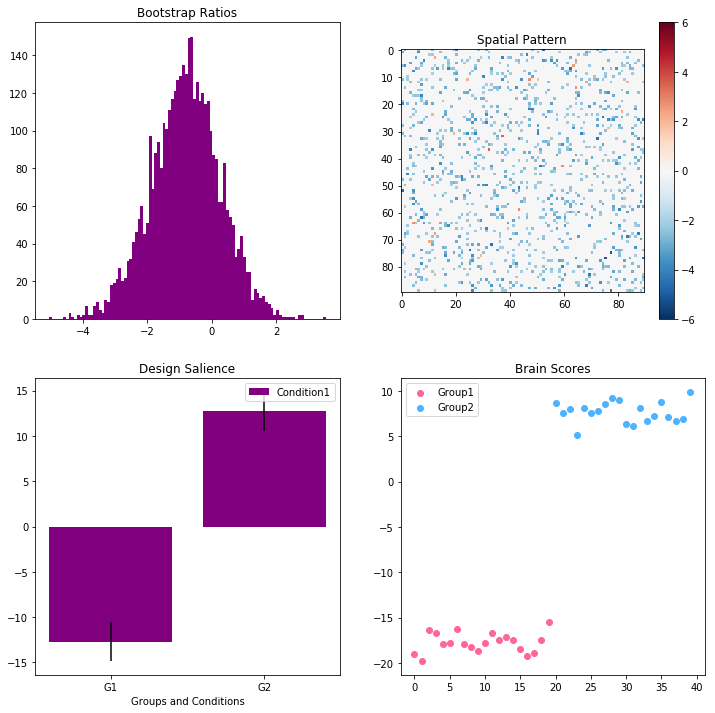

In [393]:
# which LV to look at?
lv = 1;
lv = lv - 1;

res = load_pls_result(plsfile)

fig = plt.figure(figsize=(12, 12))

# plot histogram of BSRs
ax = fig.add_subplot(2,2,1)
plt.hist(res['bsr'][:,lv], bins=100, color=(.5,0,.5)); 
plt.title('Bootstrap Ratios')

# spatial pattern
ax = fig.add_subplot(2,2,2)
[pls_connmat, pls_stats] = make_pls_connmat(res,1,2)
plt.imshow(pls_connmat,cmap='RdBu_r',vmin=-6,vmax=6), plt.colorbar(); 
plt.title('Spatial Pattern')
#plt.show()

# plot design salience with error bars
ax = fig.add_subplot(2,2,3)
res_err = (res['design_salience'][:,lv] - res['ul'][:,lv]) - (res['design_salience'][:,lv]-res['ll'][:,lv])
plt.bar(np.arange(np.shape(res['design_salience'])[0]),res['design_salience'][:,lv].T,width=.8,color=((.5,0,.5)),yerr = res_err); 
plt.title('Design Salience')
ax.set_xlabel('Groups and Conditions')
ax.set_xticks(np.arange(np.shape(res['design_salience'])[0]))
ax.set_xticklabels(['G1', 'G2'])
ax.legend(['Condition1'])

# brain scores
ax = fig.add_subplot(2,2,4)
#plt.scatter(np.arange(np.shape(res['brainscores'])[0]),res['brainscores'][:,lv_ind]);
ind1 = 0
clist = [(1,.4,.6),(.3,.7,1)]
for i in range(len(res['numsubj'])):
    ind2 = res['numsubj'][i] + ind1
    plt.scatter(np.arange(ind1,ind2),res['brainscores'][ind1:ind2,lv_ind],c=clist[i]);
    ind1 = ind1 + ind2

plt.title('Brain Scores')
ax.legend(['Group1', 'Group2'])

plt.show()

In [383]:
plt.scatter?